# Neural Networks with TensorFlow and Keras 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd
print(pd.__version__)

0.19.2


In [4]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
print(tf.__version__)

1.1.0


In [5]:
import keras
print(keras.__version__)

Using TensorFlow backend.


2.0.8


## First Step: Load Data and disassemble for our purposes
### We need a few more data point samples for this approach

In [6]:
df = pd.read_csv('./insurance-customers-1500.csv', sep=';')

In [7]:
y=df['group']

In [8]:
df.drop('group', axis='columns', inplace=True)

In [9]:
X = df.as_matrix()

In [10]:
df.describe()

,max speed,age,thousand km per year
count,1500.000000,1500.000000,1500.000000
mean,171.386000,44.969333,30.511333
std,19.269126,16.935040,15.112317
min,118.000000,18.000000,5.000000
25%,158.000000,32.000000,18.000000
50%,170.000000,42.000000,29.000000
75%,187.000000,55.000000,42.000000
max,216.000000,90.000000,84.000000


## Second Step: Deep Learning as Alchemy

In [11]:
# ignore this, it is just technical code
# should come from a lib, consider it to appear magically 
# http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cmap_print = ListedColormap(['#AA8888', '#004000', '#FFFFDD'])
cmap_bold = ListedColormap(['#AA4444', '#006000', '#AAAA00'])
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#FFFFDD'])
font_size=25

def meshGrid(x_data, y_data):
    h = 1  # step size in the mesh
    x_min, x_max = x_data.min() - 1, x_data.max() + 1
    y_min, y_max = y_data.min() - 1, y_data.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return (xx,yy)
    
def plotPrediction(clf, x_data, y_data, x_label, y_label, colors, title="", mesh=True, fixed=None, fname=None, print=False):
    xx,yy = meshGrid(x_data, y_data)
    plt.figure(figsize=(20,10))

    if clf and mesh:
        grid_X = np.array(np.c_[yy.ravel(), xx.ravel()])
        if fixed:
            fill_values = np.full((len(grid_X), 1), fixed)
            grid_X = np.append(grid_X, fill_values, axis=1)
        Z = clf.predict(grid_X)
        Z = np.argmax(Z, axis=1)
        Z = Z.reshape(xx.shape)
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    if print:
        plt.scatter(x_data, y_data, c=colors, cmap=cmap_print, s=200, marker='o', edgecolors='k')
    else:
        plt.scatter(x_data, y_data, c=colors, cmap=cmap_bold, s=80, marker='o', edgecolors='k')
    plt.xlabel(x_label, fontsize=font_size)
    plt.ylabel(y_label, fontsize=font_size)
    plt.title(title, fontsize=font_size)
    if fname:
        plt.savefig(fname)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

In [14]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((900, 3), (900,), (600, 3), (600,))

In [18]:
# tiny little pieces of feature engeneering
from keras.utils.np_utils import to_categorical

num_categories = 3

y_train_categorical = to_categorical(y_train, num_categories)
y_test_categorical = to_categorical(y_test, num_categories)

In [44]:
from keras.layers import Input
from keras.layers import Dense
from keras.models import Model
from keras.layers import Dropout

inputs = Input(name='input', shape=(3, ))
x = Dense(100, name='hidden1', activation='relu')(inputs)
x = Dense(100, name='hidden2', activation='relu')(x)
predictions = Dense(3, name='softmax', activation='softmax')(x)
model = Model(input=inputs, output=predictions)

# loss function: http://cs231n.github.io/linear-classify/#softmax
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 3)                 0         
_________________________________________________________________
hidden1 (Dense)              (None, 100)               400       
_________________________________________________________________
hidden2 (Dense)              (None, 100)               10100     
_________________________________________________________________
softmax (Dense)              (None, 3)                 303       
Total params: 10,803
Trainable params: 10,803
Non-trainable params: 0
_________________________________________________________________


In [45]:
%time model.fit(X_train, y_train_categorical, epochs=500, batch_size=100)

Epoch 1/500
900/900 [==============================] - 0s - loss: 2.9145 - acc: 0.3600     
Epoch 2/500
900/900 [==============================] - 0s - loss: 1.5771 - acc: 0.3844     
Epoch 3/500
900/900 [==============================] - 0s - loss: 1.2478 - acc: 0.4211     
Epoch 4/500
900/900 [==============================] - 0s - loss: 1.1323 - acc: 0.4922     
Epoch 5/500
900/900 [==============================] - 0s - loss: 0.9198 - acc: 0.5667     
Epoch 6/500
900/900 [==============================] - 0s - loss: 0.8798 - acc: 0.6167     
Epoch 7/500
900/900 [==============================] - 0s - loss: 0.8213 - acc: 0.6267     
Epoch 8/500
900/900 [==============================] - 0s - loss: 0.8271 - acc: 0.6389     
Epoch 9/500
900/900 [==============================] - 0s - loss: 0.8202 - acc: 0.6356     
Epoch 10/500
900/900 [==============================] - 0s - loss: 0.7973 - acc: 0.6578     
Epoch 11/500
900/900 [==============================] - 0s - loss: 0.7980 - acc

900/900 [==============================] - 0s - loss: 0.8266 - acc: 0.6467     
Epoch 90/500
900/900 [==============================] - 0s - loss: 0.7779 - acc: 0.6767     
Epoch 91/500
900/900 [==============================] - 0s - loss: 0.8724 - acc: 0.6000     
Epoch 92/500
900/900 [==============================] - 0s - loss: 0.8342 - acc: 0.6433     
Epoch 93/500
900/900 [==============================] - 0s - loss: 0.9186 - acc: 0.6056     
Epoch 94/500
900/900 [==============================] - 0s - loss: 0.8933 - acc: 0.6056     
Epoch 95/500
900/900 [==============================] - 0s - loss: 0.7974 - acc: 0.6611     
Epoch 96/500
900/900 [==============================] - 0s - loss: 0.8495 - acc: 0.6444     
Epoch 97/500
900/900 [==============================] - 0s - loss: 0.8215 - acc: 0.6578     
Epoch 98/500
900/900 [==============================] - 0s - loss: 0.7785 - acc: 0.6700     
Epoch 99/500
900/900 [==============================] - 0s - loss: 0.7801 - acc: 0.

900/900 [==============================] - 0s - loss: 0.8165 - acc: 0.6411     
Epoch 177/500
900/900 [==============================] - 0s - loss: 0.8278 - acc: 0.6422     
Epoch 178/500
900/900 [==============================] - 0s - loss: 0.8420 - acc: 0.6311     
Epoch 179/500
900/900 [==============================] - 0s - loss: 0.7996 - acc: 0.6622     
Epoch 180/500
900/900 [==============================] - 0s - loss: 0.8626 - acc: 0.6278     
Epoch 181/500
900/900 [==============================] - 0s - loss: 0.7710 - acc: 0.6778     
Epoch 182/500
900/900 [==============================] - 0s - loss: 0.7796 - acc: 0.6611     
Epoch 183/500
900/900 [==============================] - 0s - loss: 0.7492 - acc: 0.6978     
Epoch 184/500
900/900 [==============================] - 0s - loss: 0.7554 - acc: 0.6922     
Epoch 185/500
900/900 [==============================] - 0s - loss: 0.7850 - acc: 0.6533     
Epoch 186/500
900/900 [==============================] - 0s - loss: 0.7676

900/900 [==============================] - 0s - loss: 0.8186 - acc: 0.6444     
Epoch 263/500
900/900 [==============================] - ETA: 0s - loss: 0.8570 - acc: 0.590 - 0s - loss: 0.8293 - acc: 0.6467     
Epoch 264/500
900/900 [==============================] - 0s - loss: 0.7960 - acc: 0.6778     
Epoch 265/500
900/900 [==============================] - 0s - loss: 0.8068 - acc: 0.6567     
Epoch 266/500
900/900 [==============================] - 0s - loss: 0.7889 - acc: 0.6578     
Epoch 267/500
900/900 [==============================] - 0s - loss: 0.8403 - acc: 0.6422     
Epoch 268/500
900/900 [==============================] - 0s - loss: 0.8576 - acc: 0.6178     
Epoch 269/500
900/900 [==============================] - 0s - loss: 0.7957 - acc: 0.6544     
Epoch 270/500
900/900 [==============================] - 0s - loss: 0.7427 - acc: 0.6900     
Epoch 271/500
900/900 [==============================] - 0s - loss: 0.7606 - acc: 0.6878     
Epoch 272/500
900/900 [=============

900/900 [==============================] - 0s - loss: 0.7411 - acc: 0.6900     
Epoch 349/500
900/900 [==============================] - 0s - loss: 0.7370 - acc: 0.6967     
Epoch 350/500
900/900 [==============================] - 0s - loss: 0.7766 - acc: 0.6700     
Epoch 351/500
900/900 [==============================] - 0s - loss: 0.7748 - acc: 0.6733     
Epoch 352/500
900/900 [==============================] - 0s - loss: 0.7776 - acc: 0.6689     
Epoch 353/500
900/900 [==============================] - 0s - loss: 0.7789 - acc: 0.6656     
Epoch 354/500
900/900 [==============================] - 0s - loss: 0.7872 - acc: 0.6711     
Epoch 355/500
900/900 [==============================] - 0s - loss: 0.7970 - acc: 0.6678     
Epoch 356/500
900/900 [==============================] - 0s - loss: 0.7817 - acc: 0.6733     
Epoch 357/500
900/900 [==============================] - 0s - loss: 0.7776 - acc: 0.6600     
Epoch 358/500
900/900 [==============================] - 0s - loss: 0.7406

900/900 [==============================] - 0s - loss: 0.7670 - acc: 0.6733     
Epoch 436/500
900/900 [==============================] - 0s - loss: 0.8120 - acc: 0.6678     
Epoch 437/500
900/900 [==============================] - 0s - loss: 0.7993 - acc: 0.6522     
Epoch 438/500
900/900 [==============================] - 0s - loss: 0.8072 - acc: 0.6733     
Epoch 439/500
900/900 [==============================] - 0s - loss: 0.7476 - acc: 0.6989     
Epoch 440/500
900/900 [==============================] - 0s - loss: 0.7319 - acc: 0.6889     
Epoch 441/500
900/900 [==============================] - 0s - loss: 0.7720 - acc: 0.6911     
Epoch 442/500
900/900 [==============================] - 0s - loss: 0.7539 - acc: 0.6922     
Epoch 443/500
900/900 [==============================] - 0s - loss: 0.7643 - acc: 0.6833     
Epoch 444/500
900/900 [==============================] - 0s - loss: 0.7993 - acc: 0.6711     
Epoch 445/500
900/900 [==============================] - 0s - loss: 0.7998

In [46]:
train_loss, train_accuracy = model.evaluate(X_train, y_train_categorical, batch_size=100)
train_accuracy

100/900 [==>...........................] - ETA: 1s

0.70666667487886214

In [47]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_categorical, batch_size=100)
test_accuracy

100/600 [====>.........................] - ETA: 0s

0.69999999801317847

### Look at all the different shapes for different kilometers per year
* now we have three dimensions, so we need to set one to a certain number

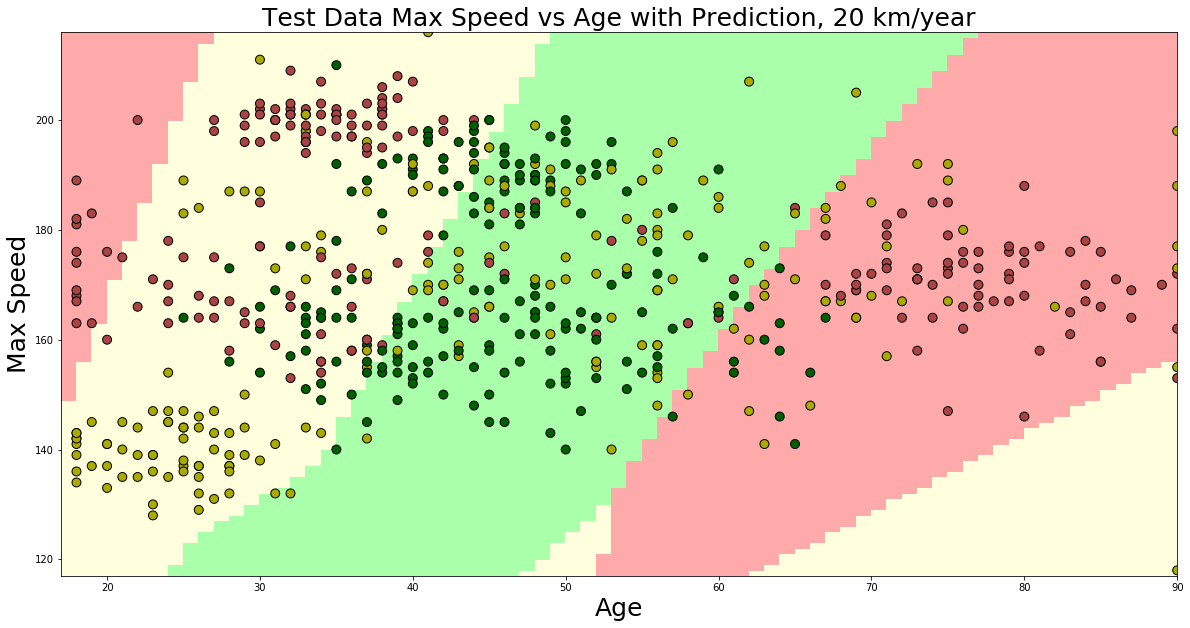

In [52]:
kms_per_year = 20
plotPrediction(model, X_test[:, 1], X_test[:, 0],
               'Age', 'Max Speed', y_test,
                fixed = kms_per_year,
                title="Test Data Max Speed vs Age with Prediction, 20 km/year")

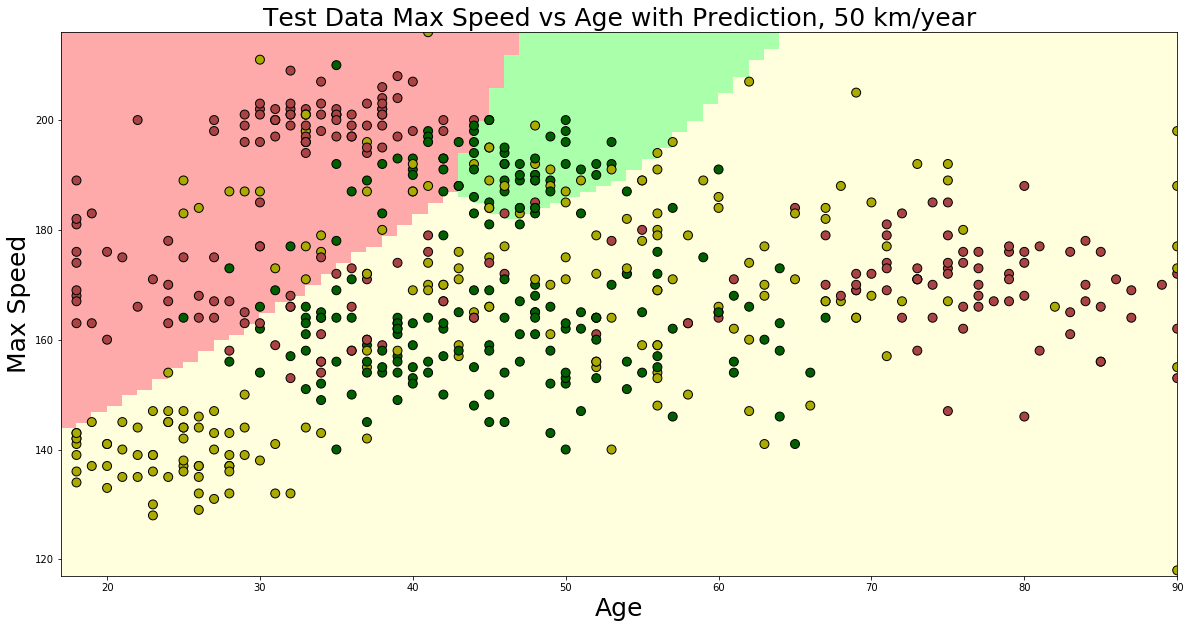

In [53]:
kms_per_year = 50
plotPrediction(model, X_test[:, 1], X_test[:, 0],
               'Age', 'Max Speed', y_test,
                fixed = kms_per_year,
                title="Test Data Max Speed vs Age with Prediction, 50 km/year")

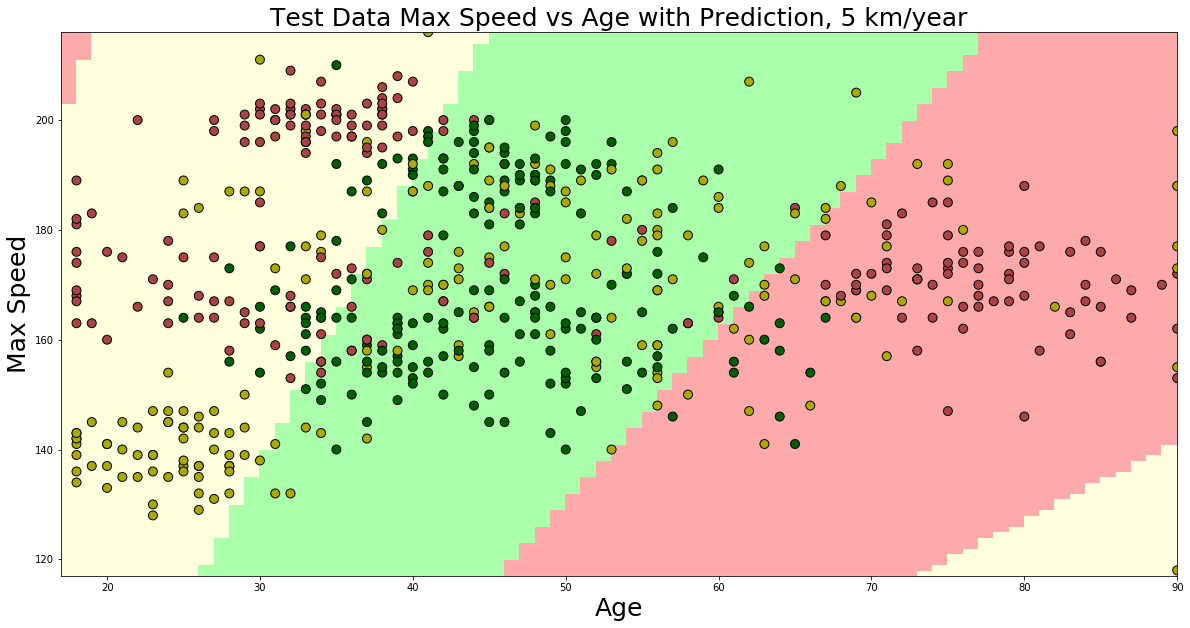

In [54]:
kms_per_year = 5
plotPrediction(model, X_test[:, 1], X_test[:, 0],
               'Age', 'Max Speed', y_test,
                fixed = kms_per_year,
                title="Test Data Max Speed vs Age with Prediction, 5 km/year")